##### Q1 #####
[('February 19, 2019', "It's a typically excellent offering from the studio, filled with big laughs and bigger feelings.", '5/5'), ('February 1, 2019', 'Finding Dory is a sweet tale that will have audiences cheering our blue friend on as she "just keeps swimming."', None), ('January 29, 2019', 'While it may not deliver the freshness of Finding Nemo, it is still overflowing with warmth, laughs, and genuine charm.', '3.5/5'), ('January 15, 2019', "The animation is crisp and the visuals are sharp as this world comes to life on the big screen. There's also a nice little message about family.", 'B'), ('December 31, 2018', 'What Finding Dory does get right is its Pixar pathos, eliciting tears at just the right moments, even when one is expecting it.', '3/5'), ('December 6, 2018', 'Feels more than a little familiar ... the similarities between this and its predecessor will likely make many see it as an inferior Pixar film, if there is such a thing.', '8.9/10'), ('November 7, 20

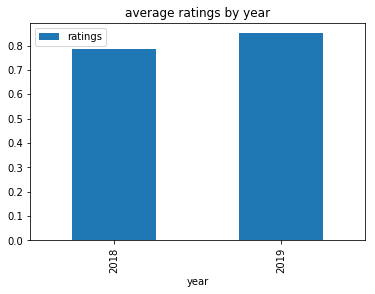

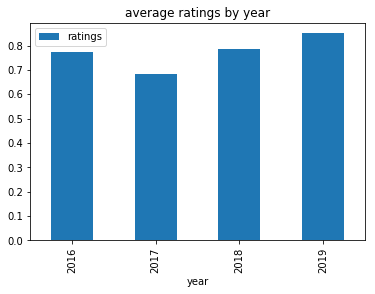

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

# Q1
def getData(movie_id):
    
    data=[] # variable to hold all reviews data
    
    #generic url for rotterntomatoes based on given movie_id
    url = "https://www.rottentomatoes.com/m/" + movie_id + "/reviews"
    
    response = requests.get(url)
    
    # check if request is successful
    if response.status_code==200:            
        
        soup = BeautifulSoup(response.content, 'html.parser')    
        divs = soup.select('div.review_table div.row.review_table_row')
        
        #iterate through all the review divs
        for div in divs:

            date = None
            desc = None
            score = None
            
            #get date
            div_date = div.select('div.review_container div.review_area div.review_date')
            if div_date != []:
                date = div_date[0].get_text().strip()
                
            #get description
            div_desc = div.select('div.review_container div.review_area div.review_desc div.the_review')
            if div_desc != []:
                desc = div_desc[0].get_text().strip()
                
            #get score if available
            div_score = div.select('div.review_container div.review_area div.review_desc div.small.subtle')
            if div_score != []:
                full_text = div_score[0].get_text().strip()
                if 'Original Score' in full_text:
                    score = full_text[full_text.find(":")+2 : ]
            
            if date != None and desc != None:
                data.append((date, desc, score))

    return data

#Q2
def plot_data(data):
    
    #empty dataframe to hold ratings and year
    df = pd.DataFrame(columns=["year", "ratings"])
    for t in data:       
        r_string = str(t[2]) 
        try:         
            ratings = float(r_string)           
        except:
            if "/" in r_string:
                index = r_string.find("/")
                ratings = float(r_string[ : index]) / float(r_string[index+1 : ])
            else:
                ratings = None
        df = df.append({"year":re.search("[2][\d]{3}", t[0])[0], "ratings":ratings}, ignore_index=True)
    
    df_ = df.groupby("year").agg(np.mean)
    
    #plot a given chart
    df_.plot(kind="bar", title="average ratings by year")

# Q3 
def getFullData(movie_id):
    
    data=[]
    next_page = "/m/" + movie_id + "/reviews/?page=1&sort="
    page_exists = True
    
    while page_exists:
    
        #generic url for rotterntomatoes based on given movie_id
        url = "https://www.rottentomatoes.com" + next_page 

        response = requests.get(url)

        # check if request is successful
        if response.status_code==200:            

            soup = BeautifulSoup(response.content, 'html.parser')    
            divs = soup.select('div.review_table div.row.review_table_row')

            for div in divs:

                date = None
                desc = None
                score = None

                #get date
                div_date = div.select('div.review_container div.review_area div.review_date')
                if div_date != []:
                    date = div_date[0].get_text().strip()

                #get description
                div_desc = div.select('div.review_container div.review_area div.review_desc div.the_review')
                if div_desc != []:
                    desc = div_desc[0].get_text().strip()

                #get score if available
                div_score = div.select('div.review_container div.review_area div.review_desc div.small.subtle')
                if div_score != []:
                    full_text = div_score[0].get_text().strip()
                    if 'Original Score' in full_text:
                        score = full_text[full_text.find(":")+2 : ]

                if date != None and desc != None:
                    data.append((date, desc, score))     
            
            next_page = list(soup.select('div.content div')[0].children)[4]['href']
            if next_page == "#":
                page_exists = False                
        
    return data


if __name__ == "__main__":

    # Test Q1
    print("##### Q1 #####")
    data=getData("finding_dory") 
    print(data)
    print("\n")

    # Test Q2
    print("##### Q2 #######")
    print("Refer figure 1")
    plot_data(data)
    print("\n")

    # Test Q3
    print("##### Q3 #######")
    print("Refer figure 2")
    data=getFullData("finding_dory") 
    print(len(data), data[-1])
    plot_data(data)